In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
import time
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
#from keras.backend import manual_variable_initialization manual_variable_initialization(True)

In [4]:
img=cv2.imread("Image/0/1.jpg")
h,w,c=img.shape
del img
data_dir=pathlib.Path("Image")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
batch_size = 32
img_height = h
img_width = w
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
print(len(class_names))

105600
Found 105600 files belonging to 44 classes.
Using 84480 files for training.
Found 105600 files belonging to 44 classes.
Using 21120 files for validation.
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '5', '6', '7', '8', '9']
44


In [3]:
plt.figure(figsize=(10, 10))
'''for images, labels in train_ds.take(1):
  for i in range(2):
    ax = plt.subplot(3, 3, i + 1)
    #cv2.imshow(images[i].numpy().astype("uint8"))
    cv2.imshow("Image",images[i].numpy())
    cv2.waitKey(0)
    #plt.title(class_names[labels[i]])
    #plt.axis("off")'''

'for images, labels in train_ds.take(1):\n  for i in range(2):\n    ax = plt.subplot(3, 3, i + 1)\n    #cv2.imshow(images[i].numpy().astype("uint8"))\n    cv2.imshow("Image",images[i].numpy())\n    cv2.waitKey(0)\n    #plt.title(class_names[labels[i]])\n    #plt.axis("off")'

<Figure size 720x720 with 0 Axes>

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 44

KeyboardInterrupt: 

In [3]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50,50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

NameError: name 'num_classes' is not defined

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [9]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2640/2640 [==============================] - 167s 51ms/step - loss: 0.0739 - accuracy: 0.9812 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 2/10
2640/2640 [==============================] - 74s 28ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 3/10
2640/2640 [==============================] - 71s 27ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 9.3654e-04 - val_accuracy: 0.9997
Epoch 4/10
2640/2640 [==============================] - 71s 27ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 4.9304e-04 - val_accuracy: 0.9999
Epoch 5/10
2640/2640 [==============================] - 72s 27ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 7.7650e-04 - val_accuracy: 0.9998
Epoch 6/10
2640/2640 [==============================] - 71s 27ms/step - loss: 7.0303e-04 - accuracy: 0.9999 - val_loss: 4.0422e-05 - val_accuracy: 1.0000
Epoch 7/10
2640/2640 [==============================] - 71s 27ms/step - loss: 0.0017 - accuracy: 0.9996

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [12]:
epochs_range = range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

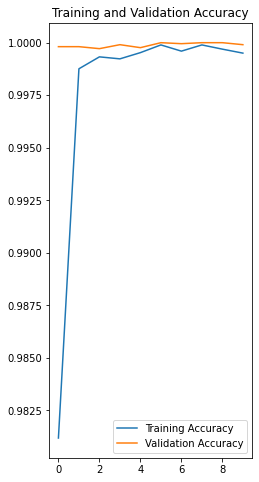

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

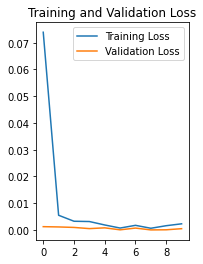

In [14]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    "15.jpg", target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 18 with a 100.00 percent confidence.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [18]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[cp_callback]
)

Epoch 1/10
2640/2640 [==============================] - 68s 26ms/step - loss: 2.5767e-04 - accuracy: 1.0000 - val_loss: 6.3375e-05 - val_accuracy: 1.0000

Epoch 00001: saving model to training_1\cp.ckpt
Epoch 2/10
2640/2640 [==============================] - 75s 29ms/step - loss: 4.6418e-07 - accuracy: 1.0000 - val_loss: 3.7400e-05 - val_accuracy: 1.0000

Epoch 00002: saving model to training_1\cp.ckpt
Epoch 3/10
2640/2640 [==============================] - 58s 22ms/step - loss: 1.2284e-07 - accuracy: 1.0000 - val_loss: 3.1497e-05 - val_accuracy: 1.0000

Epoch 00003: saving model to training_1\cp.ckpt
Epoch 4/10
2640/2640 [==============================] - 54s 20ms/step - loss: 3.6211e-08 - accuracy: 1.0000 - val_loss: 1.8162e-05 - val_accuracy: 1.0000

Epoch 00004: saving model to training_1\cp.ckpt
Epoch 5/10
2640/2640 [==============================] - 53s 20ms/step - loss: 9.4162e-09 - accuracy: 1.0000 - val_loss: 1.2055e-05 - val_accuracy: 1.0000

Epoch 00005: saving model to trai

In [1]:
!mkdir -p saved_model
model.save('saved_model/my_model')


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


NameError: name 'model' is not defined

In [17]:
img = keras.preprocessing.image.load_img(
    "12.jpg", target_size=(50,50)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = test_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
cl=predictions.argmax(axis=-1)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(cl, 100 * np.max(score))
)

This image most likely belongs to [4] with a 100.00 percent confidence.


In [7]:
new_model = tf.keras.models.load_model('saved_model/model3')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [5]:
new_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50,50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(44)
])

In [12]:
new_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
loss, acc = new_model.evaluate(val_ds, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

660/660 - 7s - loss: 12.1134 - accuracy: 0.1264
Untrained model, accuracy: 12.64%


In [11]:
checkpoint_path = "training_1/cp.ckpt"
new_model.load_weights(checkpoint_path)
loss, acc = new_model.evaluate(val_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

660/660 - 6s - loss: 12.1134 - accuracy: 0.1264
Restored model, accuracy: 12.64%


In [25]:
new_model.save('saved_model/new_model')
model.save('saved_model/model2')

INFO:tensorflow:Assets written to: saved_model/new_model\assets
INFO:tensorflow:Assets written to: saved_model/model2\assets


In [8]:
test_model=keras.models.load_model('saved_model/model2')

In [28]:
loss, acc = test_model.evaluate(val_ds, verbose=2)
print("Test model, accuracy: {:5.2f}%".format(100 * acc))

660/660 - 4s - loss: 1.4758e-06 - accuracy: 1.0000
Test model, accuracy: 100.00%


In [30]:
tf.keras.backend.clear_session()